# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# manipulation data
import numpy as np
import pandas as pd

# visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing library
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

| Kolom                      | Deskripsi                                            | Tipe        |
|----------------------------|-----------------------------------------------------|-------------|
| person_age                 | Usia orang                                          | Float       |
| person_gender              | Jenis kelamin orang                                 | Kategorikal |
| person_education           | Tingkat pendidikan tertinggi                        | Kategorikal |
| person_income              | Pendapatan tahunan                                  | Float       |
| person_emp_exp             | Tahun pengalaman kerja                              | Integer     |
| person_home_ownership      | Status kepemilikan rumah (misal: sewa, punya, kredit) | Kategorikal |
| loan_amnt                 | Jumlah pinjaman yang diminta                        | Float       |
| loan_intent               | Tujuan pinjaman                                    | Kategorikal |
| loan_int_rate             | Suku bunga pinjaman                                | Float       |
| loan_percent_income       | Jumlah pinjaman sebagai persentase pendapatan tahunan | Float       |
| cb_person_cred_hist_length | Lama riwayat kredit dalam tahun                     | Float       |
| credit_score              | Skor kredit orang                                  | Integer     |
| previous_loan_defaults_on_file | Indikator adanya default pinjaman sebelumnya        | Kategorikal |
| loan_status (target variable) | Status persetujuan pinjaman: 1 = disetujui; 0 = ditolak | Integer     |

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


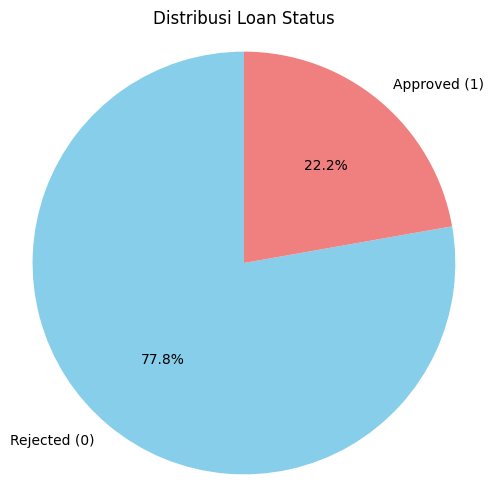

In [ ]:
loan_status_counts = df['loan_status'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(loan_status_counts, labels=[ 'Rejected (0)', 'Approved (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribusi Loan Status')
plt.axis('equal')
plt.show()

## 4.2. Bivariate Analysis

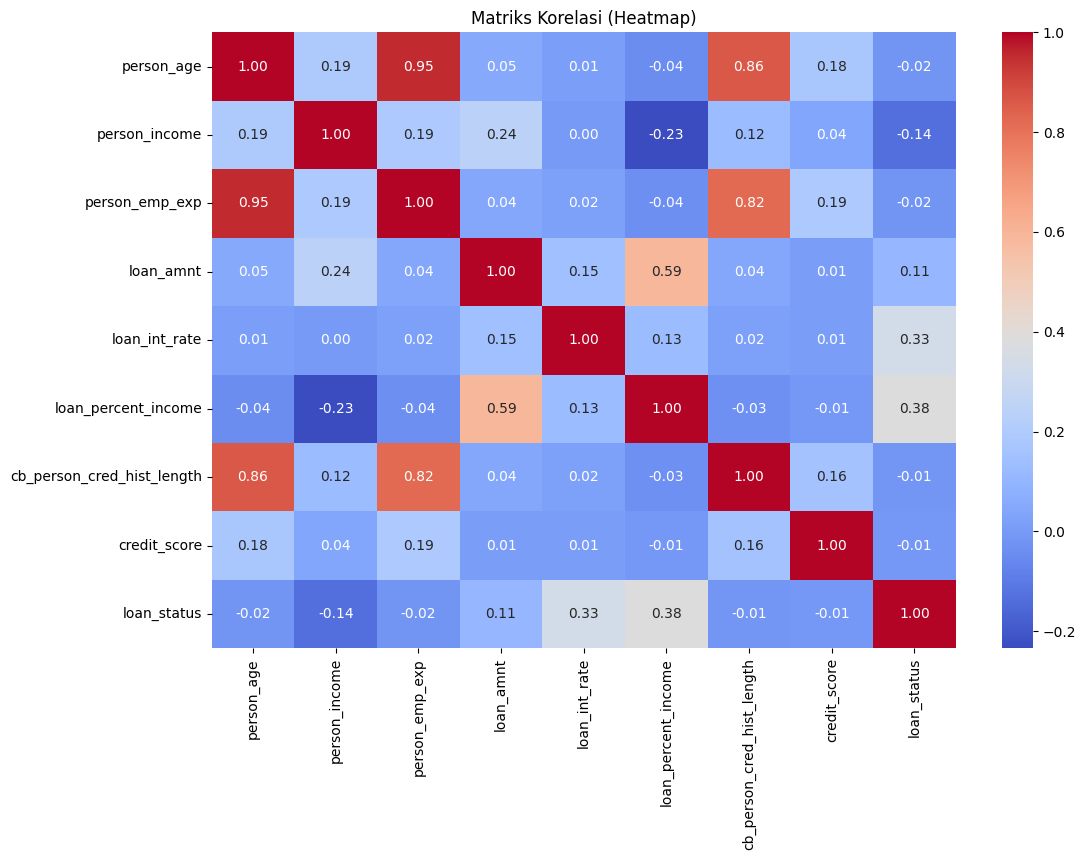

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi (Heatmap)')
plt.show()

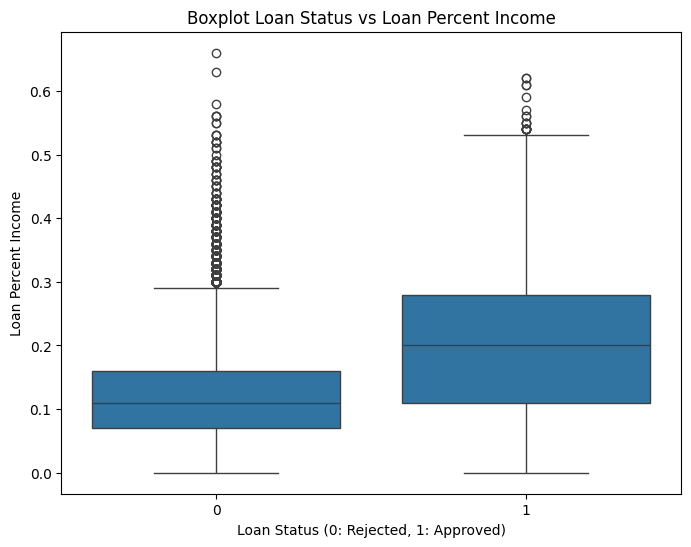

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)
plt.title('Boxplot Loan Status vs Loan Percent Income')
plt.xlabel('Loan Status (0: Rejected, 1: Approved)')
plt.ylabel('Loan Percent Income')
plt.show()

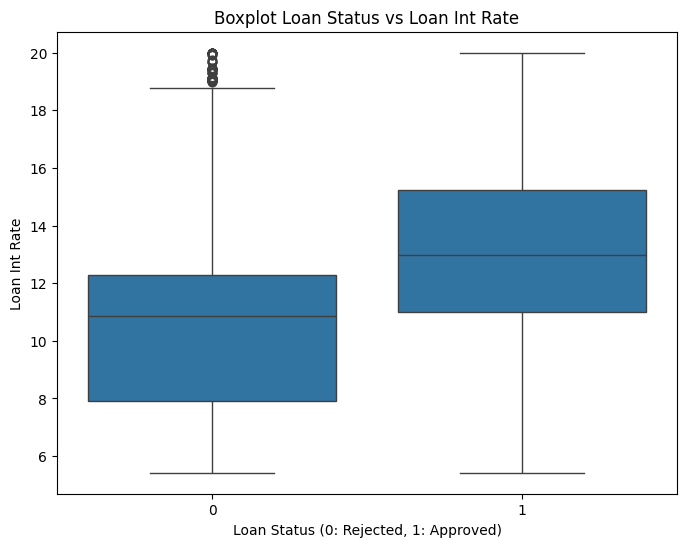

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_int_rate', data=df)
plt.title('Boxplot Loan Status vs Loan Int Rate')
plt.xlabel('Loan Status (0: Rejected, 1: Approved)')
plt.ylabel('Loan Int Rate')
plt.show()

In [ ]:
def categorical_dist(df, col):
  plt.figure(figsize=(10, 6))
  sns.countplot(x=col, hue='loan_status', data=df, palette='viridis')
  plt.title(f'Distribusi {col} berdasarkan Loan Status')
  plt.legend(title='Loan Status', labels=['Rejected (0)', 'Approved (1)'])
  plt.xlabel(col)
  plt.ylabel('Jumlah')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

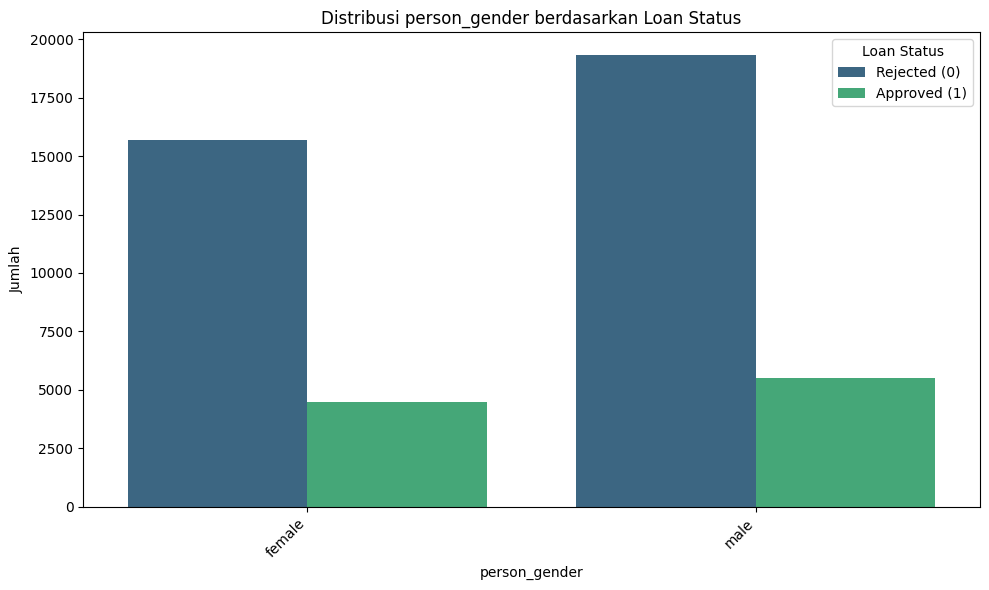

In [ ]:
categorical_dist(df, 'person_gender')

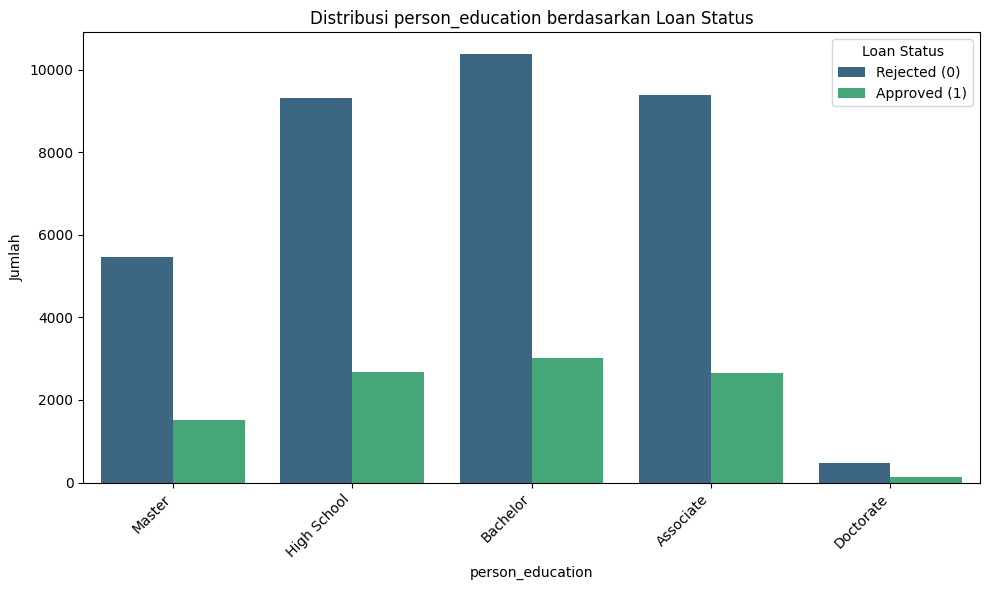

In [ ]:
categorical_dist(df, 'person_education')

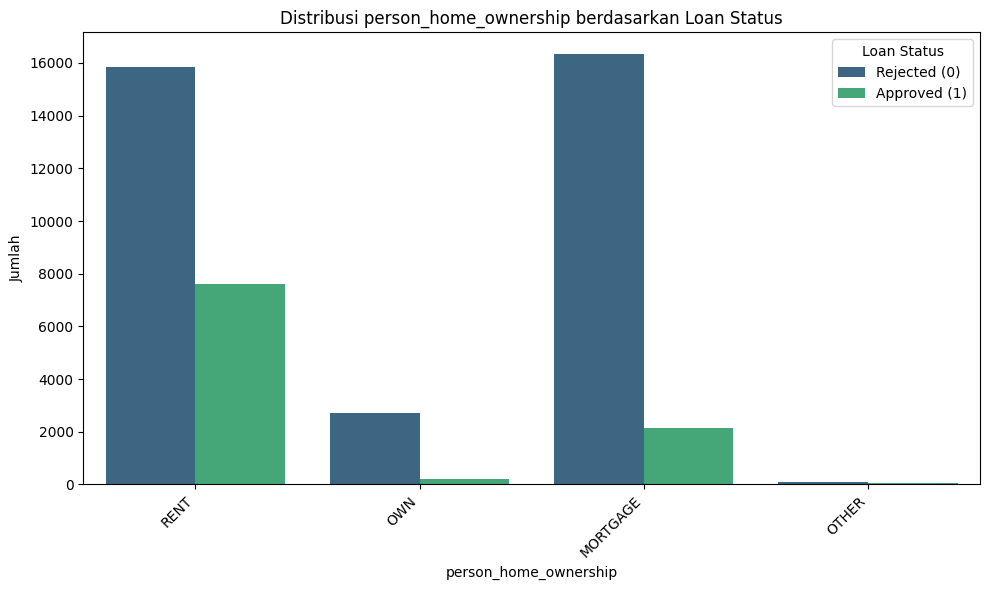

In [ ]:
categorical_dist(df, 'person_home_ownership')

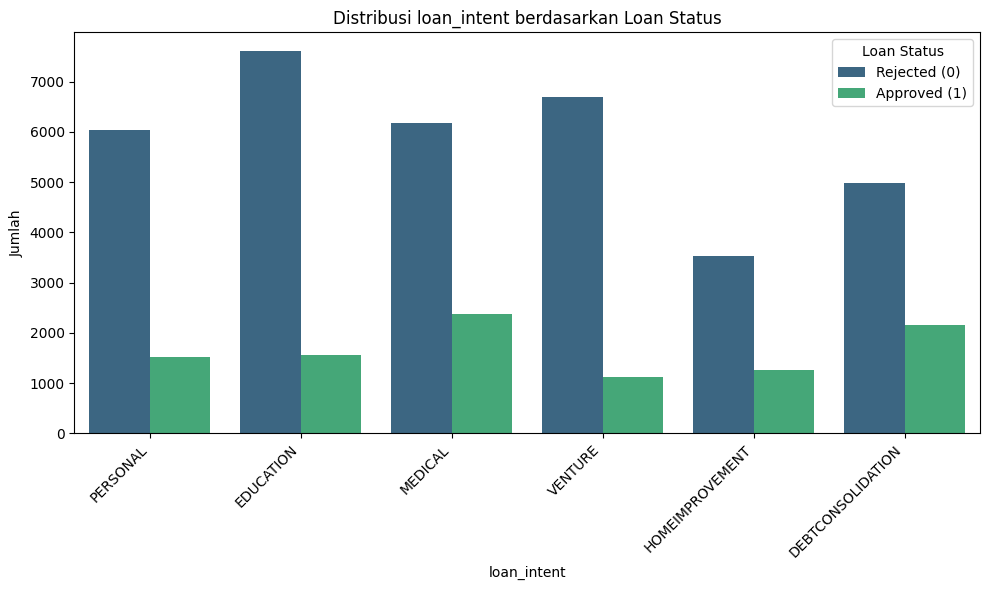

In [ ]:
categorical_dist(df, 'loan_intent')

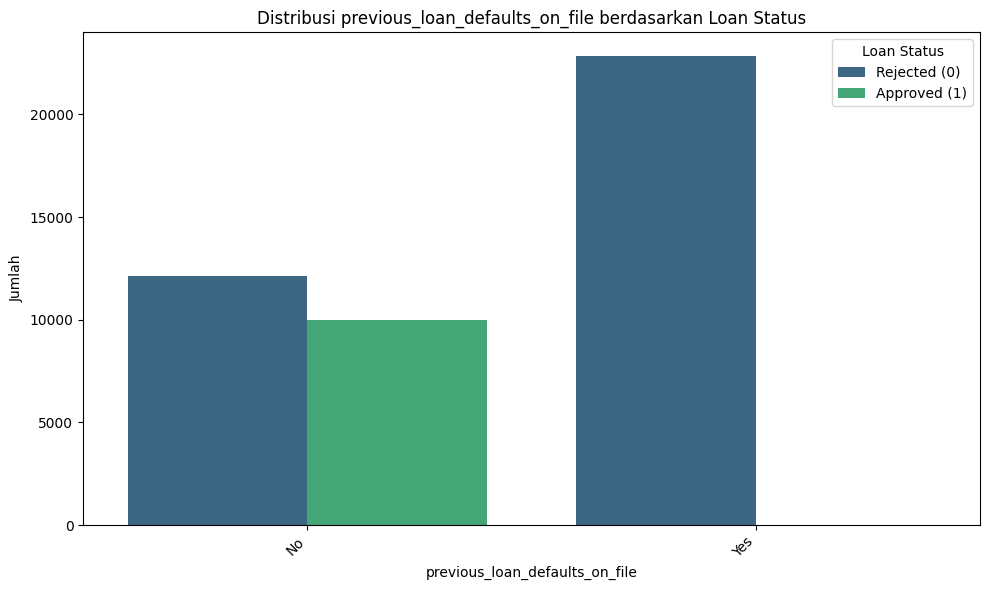

In [ ]:
categorical_dist(df, 'previous_loan_defaults_on_file')

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Deteksi dan Penanganan Outlier
4. Encoding Data Kategorikal
5. Binning (Pengelompokan Data)
6. Normalisasi atau Standarisasi Fitur

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## 5.1. Data Kosong

In [20]:
df_preprocessed = df.copy()
df_preprocessed.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df_preprocessed.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [5]:
df_preprocessed.dropna()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


## 5.2. Data Duplikat

In [16]:
df_preprocessed.duplicated().sum()

np.int64(0)

In [7]:
df_preprocessed.drop_duplicates(inplace=True)

## 5.3. Spliting data

In [21]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## 5.4. Outlier Handling

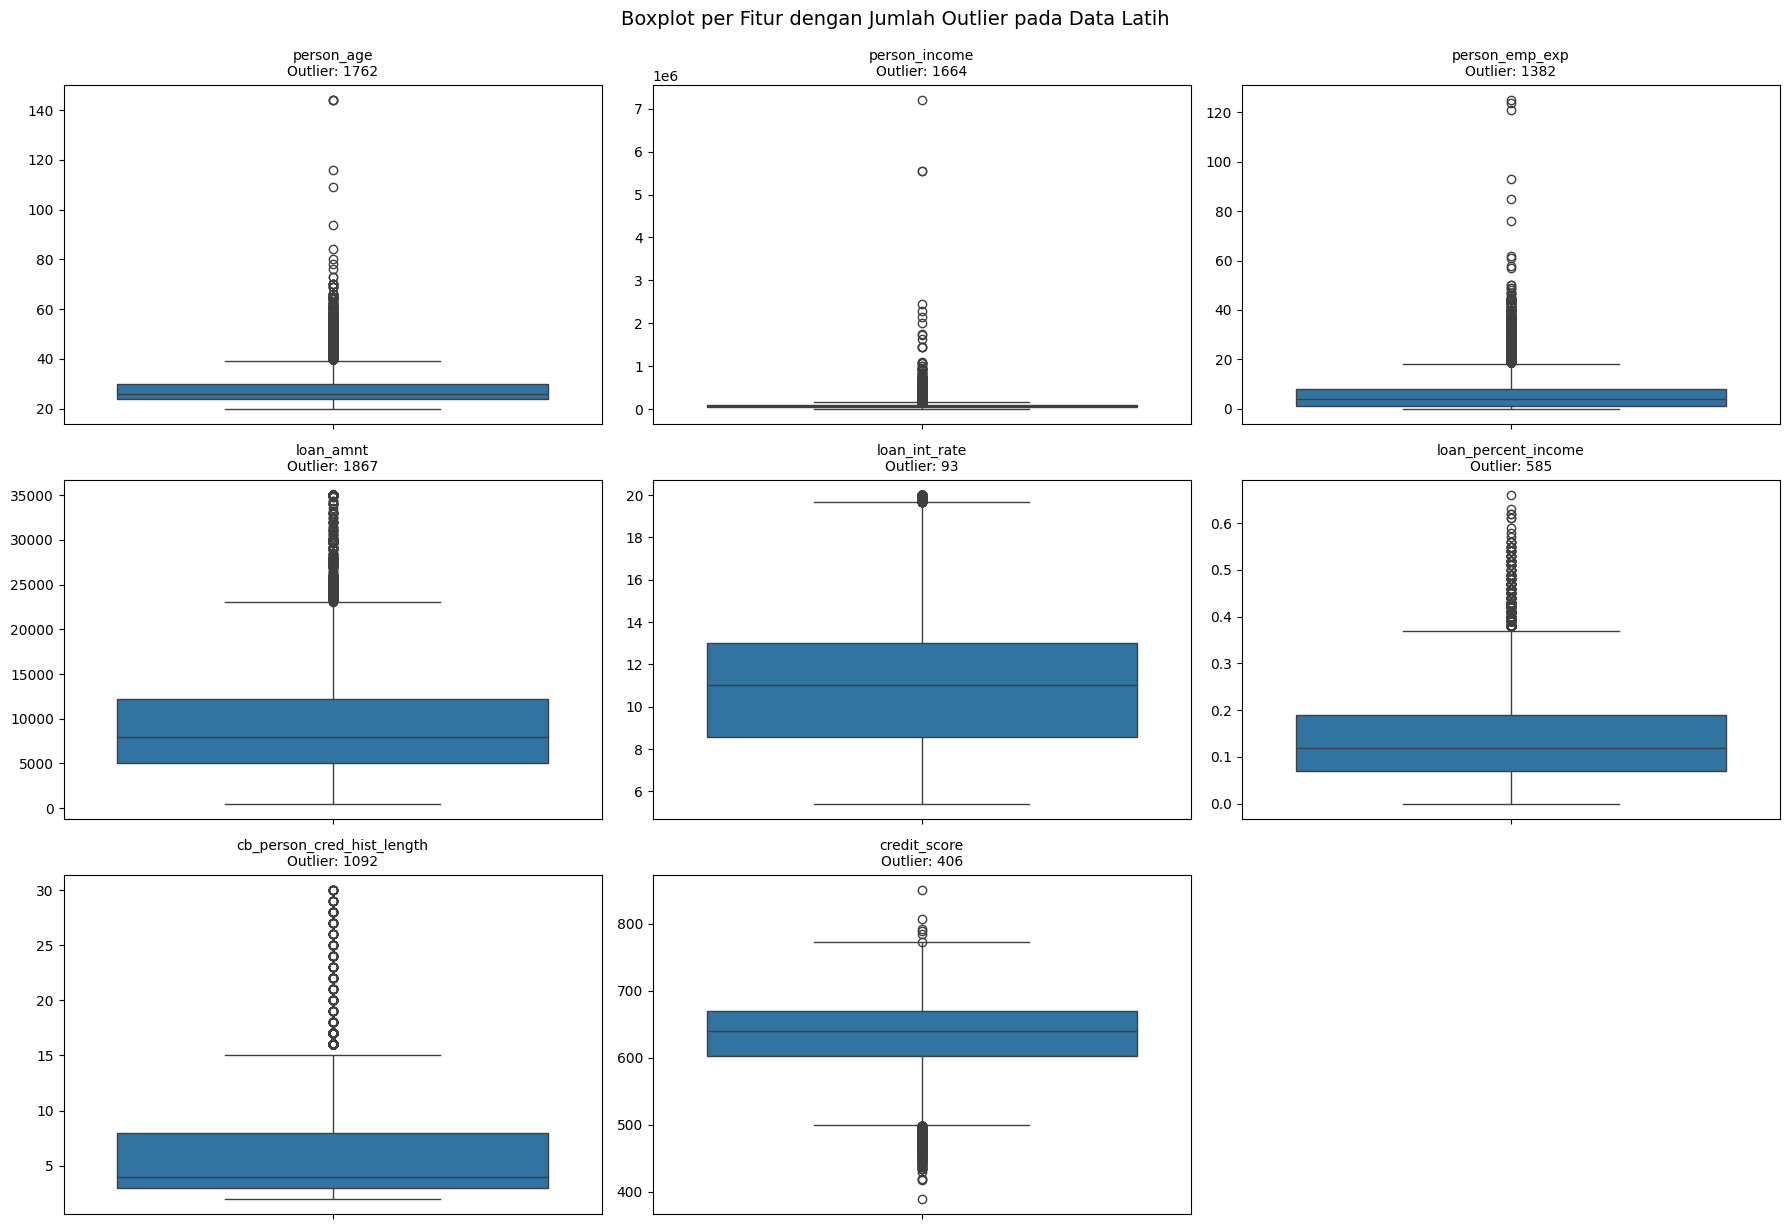

In [22]:
numeric_cols_train = X_train.select_dtypes(include=['float64', 'int64']).columns
n_cols = 3
n_rows = (len(numeric_cols_train) + 1) // n_cols
plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(numeric_cols_train, 1):
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = X_train[(X_train[col] < lower_bound) | (X_train[col] > upper_bound)]
    num_outliers = outliers.shape[0]
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=X_train[col])
    plt.title(f'{col}\nOutlier: {num_outliers}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle("Boxplot per Fitur dengan Jumlah Outlier pada Data Latih", fontsize=14, y=1.02)
plt.show()

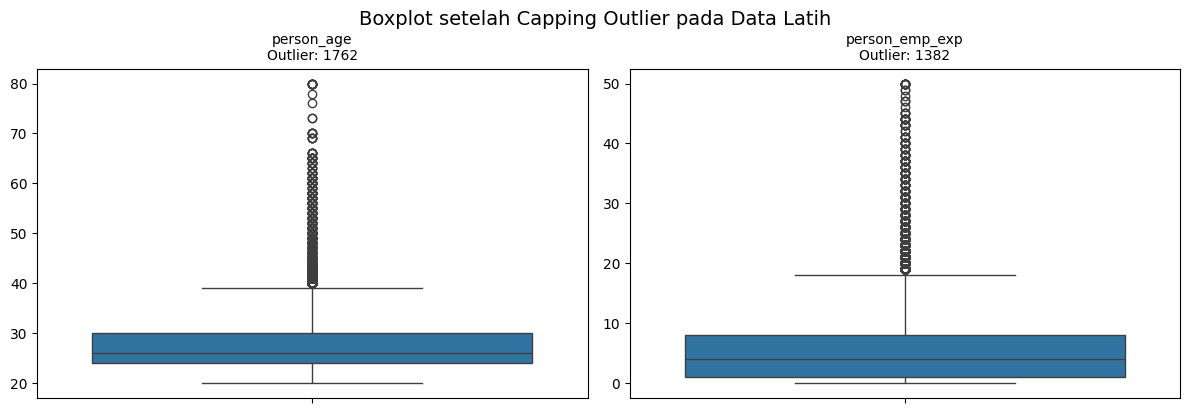

In [23]:
X_train['person_age'] = X_train['person_age'].clip(upper=80)
X_train['person_emp_exp'] = X_train['person_emp_exp'].clip(upper=50)

numeric_cols_after_capping_train = ['person_age', 'person_emp_exp']
n_cols = 2
n_rows = (len(numeric_cols_after_capping_train) + 1) // n_cols
plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(numeric_cols_after_capping_train, 1):
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = X_train[(X_train[col] < lower_bound) | (X_train[col] > upper_bound)]
    num_outliers = outliers.shape[0]
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=X_train[col])
    plt.title(f'{col}\nOutlier: {num_outliers}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle("Boxplot setelah Capping Outlier pada Data Latih", fontsize=14, y=1.02)
plt.show()

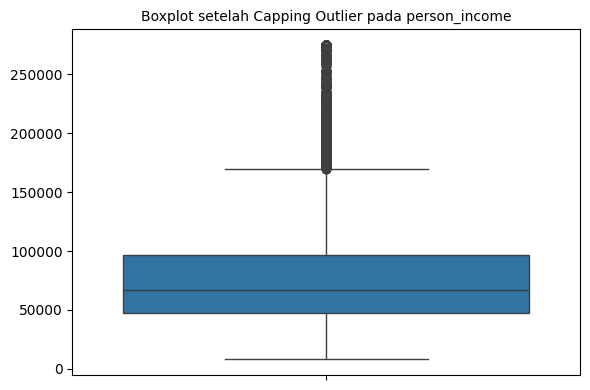

In [24]:
upper_limit_income = X_train['person_income'].quantile(0.99)
X_train['person_income'] = X_train['person_income'].clip(upper=upper_limit_income)

plt.figure(figsize=(6, 4))
sns.boxplot(y=X_train['person_income'])
plt.title(f'Boxplot setelah Capping Outlier pada person_income', fontsize=10)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

## 5.5 Encoding

In [25]:
# multi encoding
cols = ['person_home_ownership', 'loan_intent']
encoder = OneHotEncoder(sparse_output=False, drop=None)
X_train_encoded = encoder.fit_transform(X_train[cols])
X_test_encoded = encoder.transform(X_test[cols])
encoded_cols = encoder.get_feature_names_out(cols)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(cols), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(cols), index=X_test.index)
X_train_final = pd.concat([X_train.drop(columns=cols), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test.drop(columns=cols), X_test_encoded_df], axis=1)

# binar encoding
cols2 = ['person_gender', 'previous_loan_defaults_on_file']
encoder = LabelEncoder()
for col in cols2:
    X_train_final[col] = encoder.fit_transform(X_train_final[col])
    X_test_final[col] = encoder.transform(X_test_final[col])


# ordinal encoding
education_order = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']
ordinal_encoder = OrdinalEncoder(categories=[education_order])
X_train_final['person_education'] = ordinal_encoder.fit_transform(X_train_final[['person_education']])
X_test_final['person_education'] = ordinal_encoder.transform(X_test_final[['person_education']])

display(X_train_final.head())

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
6048,24.0,1,3.0,58914.0,2,4400.0,5.99,0.07,4.0,656,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3346,23.0,0,0.0,45873.0,2,11000.0,11.01,0.24,2.0,634,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17998,29.0,0,3.0,240947.0,7,10000.0,12.69,0.04,9.0,638,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24988,30.0,0,2.0,96316.0,10,6000.0,13.49,0.06,8.0,682,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23231,29.0,1,2.0,73033.0,7,8000.0,10.51,0.11,8.0,644,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 5.6. SMOTE

In [26]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_final, y_train)

print("Shape sebelum SMOTE:", X.shape)
print("Shape setelah SMOTE:", X_train.shape)
print("\nDistribusi kelas setelah SMOTE:\n", y_train.value_counts())

Shape sebelum SMOTE: (45000, 13)
Shape setelah SMOTE: (56000, 21)

Distribusi kelas setelah SMOTE:
 loan_status
0    28000
1    28000
Name: count, dtype: int64


## 5.7. Scaling

In [27]:
scaler = RobustScaler()
X_train[numeric_cols_train] = scaler.fit_transform(X_train[numeric_cols_train])
X_test_final[numeric_cols_train] = scaler.transform(X_test_final[numeric_cols_train])

display(X_train.head())
display(X_test_final.head())

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,-0.333333,1,3.0,-0.045654,-0.333333,-0.455556,-1.345375,-0.466667,-0.103044,0.269841,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.500000,0,0.0,-0.330704,-0.333333,0.277778,-0.117415,0.666667,-0.503044,-0.079365,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.500000,0,3.0,3.933227,0.500000,0.166667,0.293536,-0.666667,0.896956,-0.015873,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.666667,0,2.0,0.771880,1.000000,-0.277778,0.489227,-0.533333,0.696956,0.682540,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.500000,1,2.0,0.262960,0.500000,-0.055556,-0.239721,-0.200000,0.696956,0.079365,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
10750,-0.166667,0,2.0,0.523944,-0.333333,0.611111,-1.484805,0.133333,-0.303044,-0.079365,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17512,-0.333333,1,2.0,0.574371,-0.333333,0.833333,0.227491,0.266667,-0.503044,-0.460317,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17070,-0.666667,0,1.0,0.200555,-0.666667,-0.222222,-0.978455,-0.333333,-0.303044,0.460317,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35943,0.166667,1,2.0,2.516762,-0.500000,-0.666667,-0.733841,-0.866667,0.296956,-0.761905,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15749,0.000000,0,2.0,2.634883,-0.166667,0.166667,1.100761,-0.533333,-0.303044,0.063492,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
